In [1]:
import numpy as np
from scipy import stats
from matplotlib import pylab as plt

In [2]:
%matplotlib inline  

In [9]:
def pdf(x):
    first = stats.multivariate_normal.pdf(x, 5, 0.5)
    second = stats.multivariate_normal.pdf(x, 9, 1)
    return 0.7 * first + 0.3 * second

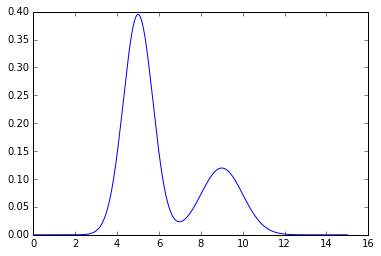

In [62]:
x = np.linspace(0, 15, 1000)
plt.plot(x, pdf(x))
plt.show()

## Sampling

In [42]:
def get_samples(N):
    b = np.random.binomial(1, 0.3, N)
    ret = np.zeros(N)
    for i in xrange(N):
        if b[i] == 1:
            ret[i] = np.sqrt(1) * np.random.randn() + 9
        else:
            ret[i] = np.sqrt(0.5) * np.random.randn() + 5
    return ret

In [50]:
samples = get_samples(1000)

## Parzen

In [51]:
def parzen(x, samples, h2):
    N = np.size(samples)
    ret = np.zeros(np.size(x))
    for i in xrange(N):
        ret += stats.multivariate_normal.pdf(x, samples[i], h2)
    return ret / N

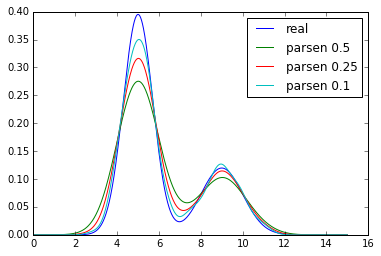

In [52]:
plt.plot(x, pdf(x), label='real')
plt.plot(x, parzen(x, 
                   , 0.5), label='parsen 0.5')
plt.plot(x, parzen(x, samples, 0.25), label='parsen 0.25')
plt.plot(x, parzen(x, samples, 0.1), label='parsen 0.1')
plt.legend()
plt.show()

# Inversion Method.

In [71]:
number = 1000 
usamples = np.random.uniform(size=number)

In [72]:
def get_exp_samples(usamples, lamb = 1):
    return (-1. / lamb) * np.log(1 - usamples)

In [73]:
samples_e = get_exp_samples(usamples) 

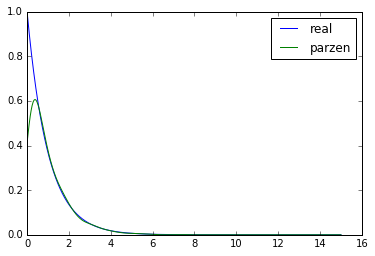

In [74]:
plt.plot(x, stats.expon.pdf(x), label='real')
plt.plot(x, parzen(x, samples_e, 0.1), label='parzen')
plt.legend()
plt.show()

# Muestreo por rechazo

In [81]:
def unnormalized_pdf(x):
    return np.exp(- (x * x)/2.)

In [90]:
def normalized_pdf(x):
    normalization = 2. / np.sqrt(2 * np.pi) 
    return np.exp(- (x * x)/2.) * normalization

In [110]:
def get_samples_reject(number):
    proposal_samples = np.random.exponential(size=number)
    k = np.sqrt(np.e)
    l = []
    uniform_samples = np.random.uniform(size=number) * k * stats.expon.pdf(proposal_samples)
    cond = uniform_samples <= unnormalized_pdf(proposal_samples)
    return proposal_samples[cond]

In [111]:
samples_r = get_samples_reject(100000)
print np.size(samples_r)

75977


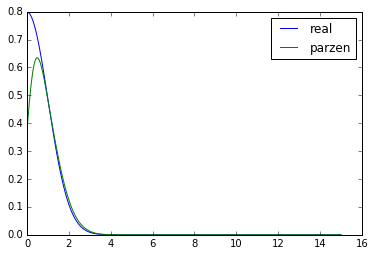

In [112]:
plt.plot(x, normalized_pdf(x), label='real')
plt.plot(x, parzen(x, samples_r, 0.1), label='parzen')
plt.legend()
plt.show()